### Customer Segmentation using K-means Clustering

In [2]:
import pandas as pd
from pandas import Series, DataFrame
from scipy.stats import iqr
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)

In [3]:
df = pd.read_excel(r"C:\Users\Niveatha\OneDrive\Niv\FMCG\FMCG_Projects\SF_project\clustering_data.xlsx")
df.head(10)

,PARTY_MASTER_CODE,NET_SALES_VALUE,NET_SALES_QTY,MRP_TUR_DIFF,Discount+schemediscount,Max. NET_SALES_VALUE,freq,BEVS,CPD,DETS,...,B.value > 1L,B.VALUE<10K,0-500,500-1000,>1000,avglen,Beverages,Food Products,Laundry,Personal care
0,P1,4168421,58137,0.106418,147951,8526,5904,774335,300297,1298353,...,0,0,3337664,282914,498376,1.733333,803,697,1434,2970
1,P4,56496,1069,0.106145,2002,1250,175,9679,4967,17409,...,0,175,48268,583,7494,1.100000,20,26,43,86
2,P6,3356777,52834,0.101835,107931,8867,6443,626718,290749,1183132,...,0,0,2640108,227427,472453,1.553333,991,825,1775,2852
3,P10,3195614,43025,0.102731,114735,11014,4877,635624,237736,1223904,...,0,0,2381932,224787,581159,1.646667,702,603,1225,2347
4,P12,608353,5392,0.112829,0,174745,950,32716,7821,340507,...,0,950,294293,273880,39975,5.475000,45,33,194,678
5,P14,7399571,88242,0.102632,269309,7833,9870,1410451,650878,2588237,...,0,0,5465664,679108,1197882,1.340000,1322,1372,2410,4766
6,P15,956,6,0.079995,0,956,1,0,0,0,...,0,1,956,0,0,0.000000,0,0,0,1
7,P17,136,1,0.100029,17,136,1,0,0,0,...,0,1,136,0,0,0.000000,0,0,0,1
8,P18,9199498,164991,0.097821,146363,16171,10166,1861291,410136,4008462,...,0,0,7127233,567098,1496540,1.386667,1417,993,2901,4855
9,P26,683446,3517,0.109476,52867,138611,33,0,0,473677,...,33,0,297426,4909,381111,158.000000,0,0,6,27


In [4]:
partynamedata=pd.read_csv(r"C:\Users\Niveatha\OneDrive\Niv\FMCG\FMCG_Projects\SFproject\FMCG_data.txt")

In [5]:
partynamedata= partynamedata[['PARTY_MASTER_CODE','PARTY_MASTER_NAME']]

In [6]:
partynamedata=partynamedata.drop_duplicates()

In [7]:
partynamedata.duplicated().sum()

0

In [8]:
partynamedata.head()

,PARTY_MASTER_CODE,PARTY_MASTER_NAME
0,P483,Sri Murugan Agency - Nilgiris
1,P383,Future Retail Limited (DC)
16,P728,Sai Enterprises ( Nilgiris )
28,P401,Avenue Supermarts Limited(Chandra Mall)
29,P160,ANNACHI ENTERPRISES PVT LTD(Wel.Colony)


In [9]:
df = pd.merge(partynamedata, df, on = 'PARTY_MASTER_CODE')

In [10]:
print('Shape of the dataset',df.shape)

Shape of the dataset (247, 24)


In [11]:
df.head()

,PARTY_MASTER_CODE,PARTY_MASTER_NAME,NET_SALES_VALUE,NET_SALES_QTY,MRP_TUR_DIFF,Discount+schemediscount,Max. NET_SALES_VALUE,freq,BEVS,CPD,...,B.value > 1L,B.VALUE<10K,0-500,500-1000,>1000,avglen,Beverages,Food Products,Laundry,Personal care
0,P483,Sri Murugan Agency - Nilgiris,1165684,19228,0.099242,27836,3229,2926,224678,103985,...,0,2926,934520,83750,142203,2.240000,371,382,1052,1121
1,P383,Future Retail Limited (DC),375501452,3569844,0.107178,2047480,1376714,27208,56171747,18140640,...,27208,0,239310409,40246473,87251713,2.820000,3350,2723,6942,14193
2,P728,Sai Enterprises ( Nilgiris ),1947892,31071,0.105316,64588,3589,4000,309662,150951,...,0,4000,1648385,88063,206768,1.740000,550,493,976,1981
3,P401,Avenue Supermarts Limited(Chandra Mall),77835997,892114,0.099984,8781750,173832,7207,11324967,3587492,...,0,0,48601707,8837796,20163221,4.733333,496,573,2265,3873
4,P160,ANNACHI ENTERPRISES PVT LTD(Wel.Colony),2027694,44035,0.094280,21597,14804,2246,506094,95398,...,0,0,1591672,106735,326134,5.285714,422,221,744,859


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PARTY_MASTER_CODE        247 non-null    object 
 1   PARTY_MASTER_NAME        247 non-null    object 
 2   NET_SALES_VALUE          247 non-null    int64  
 3   NET_SALES_QTY            247 non-null    int64  
 4   MRP_TUR_DIFF             247 non-null    float64
 5   Discount+schemediscount  247 non-null    int64  
 6   Max. NET_SALES_VALUE     247 non-null    int64  
 7   freq                     247 non-null    int64  
 8   BEVS                     247 non-null    int64  
 9   CPD                      247 non-null    int64  
 10  DETS                     247 non-null    int64  
 11  PP                       247 non-null    int64  
 12  B.value 10K-50K          247 non-null    int64  
 13  B.value 50K-1L           247 non-null    int64  
 14  B.value > 1L             2

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

PARTY_MASTER_CODE          0
PARTY_MASTER_NAME          0
NET_SALES_VALUE            0
NET_SALES_QTY              0
MRP_TUR_DIFF               0
Discount+schemediscount    0
Max. NET_SALES_VALUE       0
freq                       0
BEVS                       0
CPD                        0
DETS                       0
PP                         0
B.value 10K-50K            0
B.value 50K-1L             0
B.value > 1L               0
B.VALUE<10K                0
0-500                      0
500-1000                   0
>1000                      0
avglen                     0
Beverages                  0
Food Products              0
Laundry                    0
Personal care              0
dtype: int64

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NET_SALES_VALUE,247.0,1.192848e+07,3.292566e+07,136.00000,1.829900e+06,4.722488e+06,1.012399e+07,3.755015e+08
NET_SALES_QTY,247.0,2.340890e+05,6.055798e+05,1.00000,2.869150e+04,7.725500e+04,1.769420e+05,5.280370e+06
MRP_TUR_DIFF,247.0,1.032863e-01,5.592258e-03,0.07679,1.007575e-01,1.035293e-01,1.061193e-01,1.251084e-01
Discount+schemediscount,247.0,2.354510e+05,6.846101e+05,0.00000,5.094700e+04,1.093670e+05,2.111675e+05,8.781750e+06
Max. NET_SALES_VALUE,247.0,4.741482e+04,1.176457e+05,136.00000,5.333000e+03,1.388900e+04,4.000000e+04,1.376714e+06
freq,247.0,5.931263e+03,4.834651e+03,1.00000,2.965000e+03,5.610000e+03,7.811500e+03,4.429000e+04
BEVS,247.0,2.129728e+06,5.431310e+06,0.00000,3.311035e+05,8.326990e+05,1.864253e+06,5.617175e+07
CPD,247.0,5.752260e+05,1.621709e+06,0.00000,1.267115e+05,2.627500e+05,5.081310e+05,1.814064e+07
DETS,247.0,4.640673e+06,1.302826e+07,0.00000,5.151920e+05,1.703641e+06,4.013080e+06,1.465003e+08
PP,247.0,4.582852e+06,1.303493e+07,0.00000,7.384860e+05,1.795436e+06,3.789026e+06,1.546887e+08


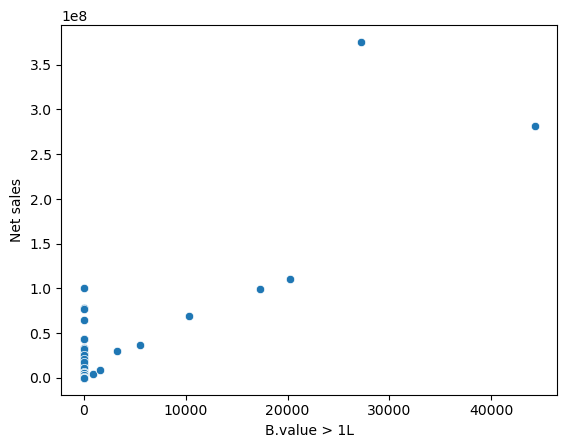

In [16]:
plt.xlabel('B.value > 1L')
plt.ylabel('Net sales')

ax = sns.scatterplot(x=df['B.value > 1L'],y=df['NET_SALES_VALUE'], data=df, )
plt.show()

Outliers

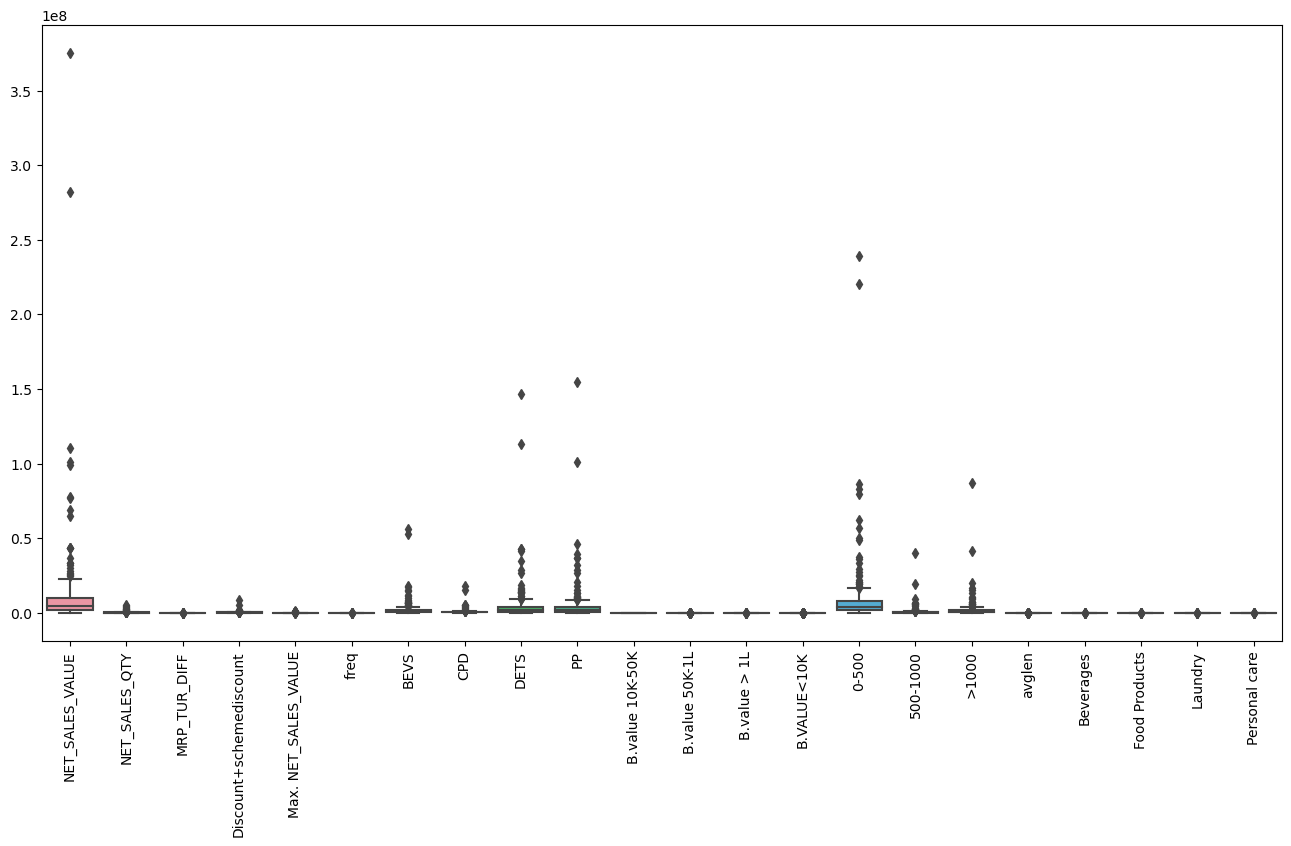

In [18]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [19]:
df_scaled = df.copy()

In [20]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PARTY_MASTER_CODE        247 non-null    object 
 1   PARTY_MASTER_NAME        247 non-null    object 
 2   NET_SALES_VALUE          247 non-null    int64  
 3   NET_SALES_QTY            247 non-null    int64  
 4   MRP_TUR_DIFF             247 non-null    float64
 5   Discount+schemediscount  247 non-null    int64  
 6   Max. NET_SALES_VALUE     247 non-null    int64  
 7   freq                     247 non-null    int64  
 8   BEVS                     247 non-null    int64  
 9   CPD                      247 non-null    int64  
 10  DETS                     247 non-null    int64  
 11  PP                       247 non-null    int64  
 12  B.value 10K-50K          247 non-null    int64  
 13  B.value 50K-1L           247 non-null    int64  
 14  B.value > 1L             2

In [21]:
df_scaled.drop(['PARTY_MASTER_CODE','PARTY_MASTER_NAME'] ,axis = 1,inplace = True)

In [22]:
from scipy.stats import zscore

#apply the scaler to the data:
df_scaled =  df_scaled.apply(zscore)
df_scaled.head()

,NET_SALES_VALUE,NET_SALES_QTY,MRP_TUR_DIFF,Discount+schemediscount,Max. NET_SALES_VALUE,freq,BEVS,CPD,DETS,PP,...,B.value > 1L,B.VALUE<10K,0-500,500-1000,>1000,avglen,Beverages,Food Products,Laundry,Personal care
0,-0.327545,-0.355522,-0.724665,-0.303876,-0.376346,-0.622871,-0.351466,-0.291173,-0.326539,-0.318322,...,-0.140515,1.321765,-0.349925,-0.245676,-0.271113,-0.160285,-0.657166,-0.468187,-0.304738,-0.750163
1,11.064660,5.519551,0.697355,2.652179,11.322113,4.409819,9.970292,10.853413,10.910720,11.539047,...,7.098678,-0.470898,9.839071,13.193328,13.110332,-0.127765,4.245812,3.826139,4.728896,4.167244
2,-0.303740,-0.335926,0.363628,-0.250084,-0.373280,-0.400274,-0.335787,-0.262153,-0.313284,-0.281583,...,-0.140515,1.979769,-0.319412,-0.244233,-0.261195,-0.188320,-0.362559,-0.264569,-0.369688,-0.426649
3,2.005771,1.088810,-0.591691,12.508802,1.076740,0.264409,1.696443,1.861235,2.284138,1.845096,...,-0.140515,-0.470898,1.687533,2.683549,2.804443,-0.020485,-0.451435,-0.117817,0.731900,0.285081
4,-0.301312,-0.314475,-1.613817,-0.313008,-0.277758,-0.763808,-0.299547,-0.296479,-0.286466,-0.313082,...,-0.140515,-0.470898,-0.321836,-0.237985,-0.242858,0.010487,-0.573228,-0.763526,-0.567957,-0.848721


### Applying K-Means clustering on scaled data and determine optimum clusters. 

In [23]:
from sklearn.cluster import KMeans


In [24]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
   

C:\Users\Niveatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Niveatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Niveatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Niveatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

In [25]:
 # The below code snippet is used to print the WSS values. We have passed it through a loop to make understand the values
# of WSS better.

for i in range(1,15):
    print('The WSS value for',i,'clusters is',wcss[i-1])

The WSS value for 1 clusters is 5433.999999999998
The WSS value for 2 clusters is 3136.4224593504414
The WSS value for 3 clusters is 2401.1185050243407
The WSS value for 4 clusters is 1834.3811294064526
The WSS value for 5 clusters is 1597.3151241916848
The WSS value for 6 clusters is 1413.7467182460518
The WSS value for 7 clusters is 1230.3150142672894
The WSS value for 8 clusters is 1017.2337150147996
The WSS value for 9 clusters is 903.7544555378526
The WSS value for 10 clusters is 763.0894622648382
The WSS value for 11 clusters is 684.191747995926
The WSS value for 12 clusters is 582.0553553973608
The WSS value for 13 clusters is 542.8960196269621
The WSS value for 14 clusters is 493.91657395592347


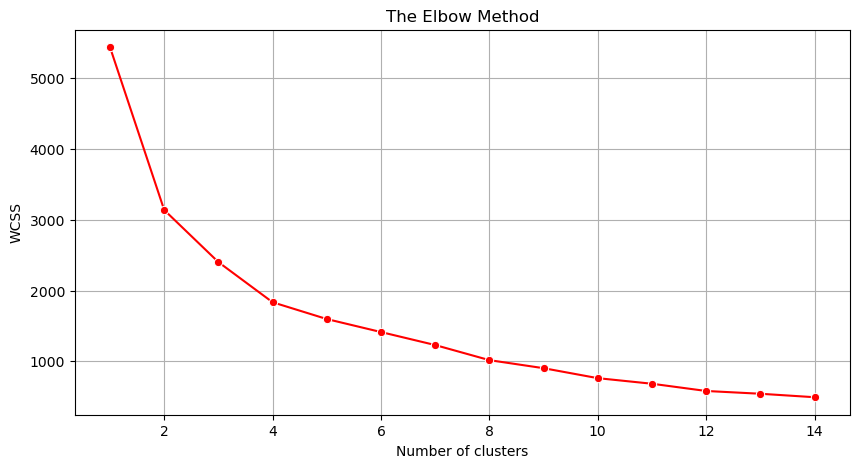

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 15), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True) 
plt.show()

In [127]:
k_means_4 = KMeans(n_clusters = 4,random_state=42)
k_means_4.fit(df_scaled)
k_labels_4 = k_means_4.labels_
k_labels_4

C:\Users\Niveatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Niveatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 1, 0, 1, 0, 1, 1, 3, 3, 2, 3, 3, 0, 3, 1, 1, 3, 3, 1, 1, 3,
       3, 3, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 3, 0, 1, 0, 3, 3, 3, 3, 1, 1, 1,
       3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3,
       3, 0, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [128]:
k_means_4.inertia_

1834.3811294064526

In [129]:
df_scaled['kmeans_cluster_4']= k_labels_4
df_scaled

,NET_SALES_VALUE,NET_SALES_QTY,MRP_TUR_DIFF,Discount+schemediscount,Max. NET_SALES_VALUE,freq,BEVS,CPD,DETS,PP,...,B.VALUE<10K,0-500,500-1000,>1000,avglen,Beverages,Food Products,Laundry,Personal care,kmeans_cluster_4
0,-0.327545,-0.355522,-0.724665,-0.303876,-0.376346,-0.622871,-0.351466,-0.291173,-0.326539,-0.318322,...,1.321765,-0.349925,-0.245676,-0.271113,-0.160285,-0.657166,-0.468187,-0.304738,-0.750163,1
1,11.064660,5.519551,0.697355,2.652179,11.322113,4.409819,9.970292,10.853413,10.910720,11.539047,...,-0.470898,9.839071,13.193328,13.110332,-0.127765,4.245812,3.826139,4.728896,4.167244,2
2,-0.303740,-0.335926,0.363628,-0.250084,-0.373280,-0.400274,-0.335787,-0.262153,-0.313284,-0.281583,...,1.979769,-0.319412,-0.244233,-0.261195,-0.188320,-0.362559,-0.264569,-0.369688,-0.426649,1
3,2.005771,1.088810,-0.591691,12.508802,1.076740,0.264409,1.696443,1.861235,2.284138,1.845096,...,-0.470898,1.687533,2.683549,2.804443,-0.020485,-0.451435,-0.117817,0.731900,0.285081,0
4,-0.301312,-0.314475,-1.613817,-0.313008,-0.277758,-0.763808,-0.299547,-0.296479,-0.286466,-0.313082,...,-0.470898,-0.321836,-0.237985,-0.242858,0.010487,-0.573228,-0.763526,-0.567957,-0.848721,1
5,1.607171,1.027286,0.126597,-0.329551,4.328010,0.885775,1.225091,2.901121,0.728253,2.460364,...,-0.470898,1.759947,1.998912,0.801965,-0.190913,0.720408,1.681727,0.480645,0.886590,0
6,-0.312922,-0.320103,0.534045,-0.254716,0.584156,-1.172732,-0.340271,-0.330816,-0.288135,-0.319500,...,-0.470898,-0.341019,-0.238502,-0.231980,-0.285881,-1.208525,-1.113896,-1.154217,-1.115808,1
7,-0.361301,-0.385570,0.512189,-0.341688,-0.393202,-1.193044,-0.391131,-0.352355,-0.355585,-0.350417,...,-0.363681,-0.387806,-0.273505,-0.291806,-0.224204,-1.234858,-1.121233,-1.167037,-1.139507,1
8,-0.071913,-0.160085,0.502889,-0.014430,-0.279683,0.363480,-0.129789,-0.074380,-0.076799,-0.041555,...,-0.470898,-0.079228,-0.023585,-0.062953,-0.203272,0.122965,0.265572,0.013175,0.571353,3
9,-0.263800,-0.306672,0.225841,-0.179647,-0.335480,-0.040056,-0.275107,-0.193454,-0.275825,-0.251964,...,-0.470898,-0.274837,-0.211028,-0.237213,-0.193553,0.149299,0.122489,0.072143,-0.163700,3


In [130]:
df_kclust_4 = df_scaled.groupby('kmeans_cluster_4').mean()
cluster_4_freq = df_scaled['kmeans_cluster_4'].value_counts().sort_index()
df_kclust_4.insert(0,'k_cluster_4_count',cluster_4_freq)
df_kclust_4

,k_cluster_4_count,NET_SALES_VALUE,NET_SALES_QTY,MRP_TUR_DIFF,Discount+schemediscount,Max. NET_SALES_VALUE,freq,BEVS,CPD,DETS,...,B.value > 1L,B.VALUE<10K,0-500,500-1000,>1000,avglen,Beverages,Food Products,Laundry,Personal care
kmeans_cluster_4,,,,,,,,,,,,,,,,,,,,,
0,10,1.855316,2.866115,-0.578081,2.216928,1.470611,1.866945,1.794074,1.524705,1.805324,...,1.130414,-0.470898,2.058446,1.186960,1.383807,-0.101514,1.545800,1.165161,2.456069,1.715161
1,119,-0.283855,-0.305692,-0.007375,-0.272311,-0.209913,-0.681686,-0.305865,-0.275047,-0.285167,...,-0.127744,0.506512,-0.303954,-0.207938,-0.233852,0.175003,-0.675505,-0.643735,-0.635615,-0.671077
2,2,9.640453,6.934723,0.649637,4.983045,7.493830,6.180028,9.631206,10.029628,9.613373,...,9.371170,-0.470898,9.432844,9.670312,9.570132,-0.170378,5.699918,6.350271,5.257898,6.297355
3,116,-0.034959,-0.053046,0.046200,0.002324,-0.040638,0.431820,-0.006942,-0.022204,-0.028837,...,-0.127974,-0.470898,-0.028273,-0.055738,-0.044396,-0.167840,0.461442,0.450451,0.349670,0.431998


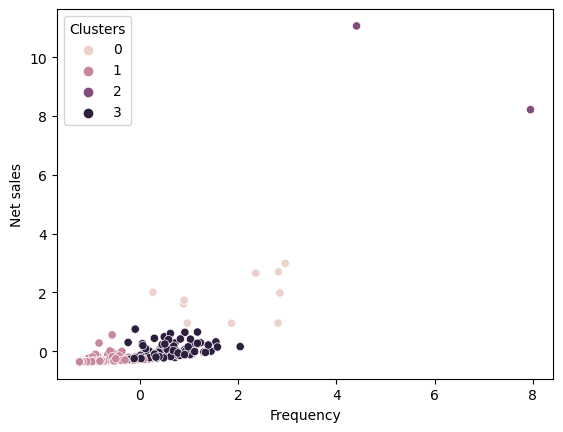

In [131]:
plt.xlabel('Frequency')
plt.ylabel('Net sales')

ax = sns.scatterplot(x=df_scaled['freq'],y=df_scaled['NET_SALES_VALUE'], data=df_scaled, hue = "kmeans_cluster_4")
plt.legend(title= 'Clusters')
plt.show()


--------------APPLYING K-MEANS for 4 CLUSTERS ENDS-------------------

In [132]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [133]:
silhouette_score(df_scaled,k_labels_4)

0.3984442901807035

In [134]:
silhouette_samples(df_scaled,k_labels_4).min()

-0.14914617960198973

In [135]:
silhouette_score(df_scaled,k_labels_4)

0.3984442901807035

In [136]:
silhouette_samples(df_scaled,k_labels_4).min()

-0.14914617960198973

In [137]:
sil_width = silhouette_samples(df_scaled,k_labels_4)

In [138]:
df_scaled["sil_width"] = sil_width


In [139]:
df.head()

,PARTY_MASTER_CODE,PARTY_MASTER_NAME,NET_SALES_VALUE,NET_SALES_QTY,MRP_TUR_DIFF,Discount+schemediscount,Max. NET_SALES_VALUE,freq,BEVS,CPD,...,B.value > 1L,B.VALUE<10K,0-500,500-1000,>1000,avglen,Beverages,Food Products,Laundry,Personal care
0,P483,Sri Murugan Agency - Nilgiris,1165684,19228,0.099242,27836,3229,2926,224678,103985,...,0,2926,934520,83750,142203,2.240000,371,382,1052,1121
1,P383,Future Retail Limited (DC),375501452,3569844,0.107178,2047480,1376714,27208,56171747,18140640,...,27208,0,239310409,40246473,87251713,2.820000,3350,2723,6942,14193
2,P728,Sai Enterprises ( Nilgiris ),1947892,31071,0.105316,64588,3589,4000,309662,150951,...,0,4000,1648385,88063,206768,1.740000,550,493,976,1981
3,P401,Avenue Supermarts Limited(Chandra Mall),77835997,892114,0.099984,8781750,173832,7207,11324967,3587492,...,0,0,48601707,8837796,20163221,4.733333,496,573,2265,3873
4,P160,ANNACHI ENTERPRISES PVT LTD(Wel.Colony),2027694,44035,0.094280,21597,14804,2246,506094,95398,...,0,0,1591672,106735,326134,5.285714,422,221,744,859


In [140]:
df['Clusters'] = k_labels_4


In [151]:
df.sort_values(by='PARTY_MASTER_CODE', ascending=False).head(200)

,PARTY_MASTER_CODE,PARTY_MASTER_NAME,NET_SALES_VALUE,NET_SALES_QTY,MRP_TUR_DIFF,Discount+schemediscount,Max. NET_SALES_VALUE,freq,BEVS,CPD,...,B.VALUE<10K,0-500,500-1000,>1000,avglen,Beverages,Food Products,Laundry,Personal care,Clusters
16,P87,Yesesi Sup.Mkt Pvt Ltd(A.Ngr),2179899,27102,0.104022,57524,21853,2495,435059,124897,...,0,1666309,153894,357096,1.820000,304,254,552,1385,1
93,P86,White Field Enterprises,12054282,163322,0.101384,412121,15556,12917,3029196,1071579,...,0,8816752,1132849,2070982,1.326667,2045,1984,2896,5992,3
22,P84,Vimala Super Market,6998010,127495,0.103529,136361,22607,5783,1532926,377784,...,0,5378400,463656,1142671,1.553333,708,817,1161,3097,3
88,P80,Nilgiris(Universal Foods),4144407,60876,0.103903,151058,10176,5315,743817,291125,...,0,3228125,311428,565709,1.660000,812,614,1234,2655,3
36,P79,Trendz Super Market(Nilgiris),2060787,32404,0.102985,69404,10521,4724,421138,143723,...,4724,1689266,107919,258258,1.560000,720,488,1143,2373,1
28,P78,THANGA NARAYANA SUPER MARKET,9343162,177810,0.107607,184419,32593,6494,1894329,352927,...,0,7205243,486014,1565584,1.486667,836,721,1331,3606,3
103,P77,Suhail Enterprises(P)Ltd,7883920,112730,0.100329,262827,7833,10916,1449115,742617,...,0,5867210,616993,1370003,1.293333,1592,1676,2470,5178,3
238,P769,Sri Sai Agencies-Vanagaram(Nilgiris),24767,374,0.105518,1122,818,65,0,11011,...,0,23003,1764,0,7.130769,0,32,0,33,1
211,P768,A.P.Super Market(Kelambakkam),166862,3238,0.095552,0,2280,458,37927,5199,...,458,139079,9545,17297,1.100000,82,31,154,191,1
210,P767,Borromean Trading Pvt Ltd(Perumbakkam)Nilgiris,258778,3796,0.101552,8447,3616,672,57601,33518,...,672,216723,14232,27373,2.100000,106,101,202,263,1
